<a href="https://colab.research.google.com/github/shankhsuri/ML/blob/master/ML_J052_EXP09_140920.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB 9**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

np.random.seed(27)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/e-shop clothing 2008.csv', sep=';')

In [ ]:
data

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [ ]:
data.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [ ]:
data.columns[data.isnull().any()]

Index([], dtype='object')

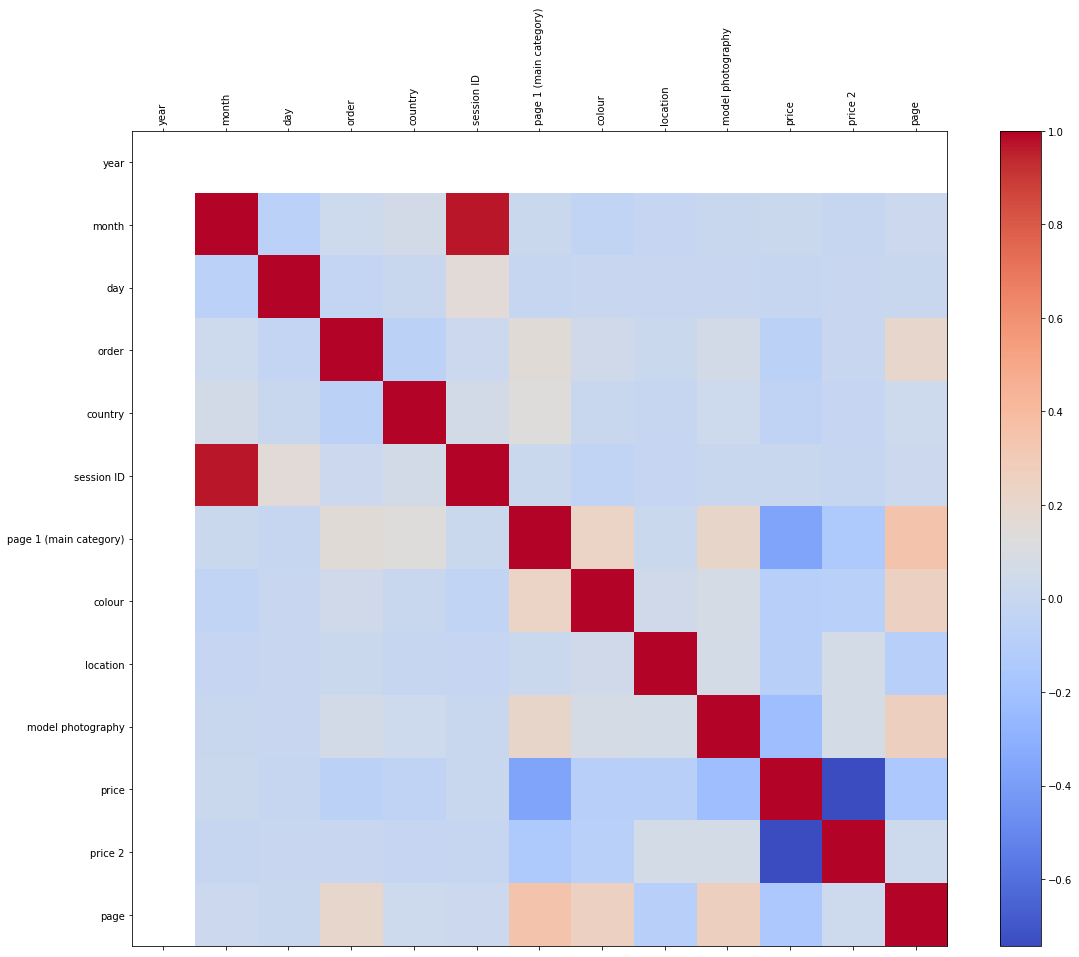

In [ ]:
corr= data.corr()
fig = plt.figure(figsize=(19, 15))
ax = fig.add_subplot()
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(rotation=90)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [ ]:
for i in range(0, len(data.columns)):
    print(data.columns[i], ":", data.iloc[:,i].nunique())

year : 1
month : 5
day : 31
order : 195
country : 47
session ID : 24026
page 1 (main category) : 4
page 2 (clothing model) : 217
colour : 14
location : 6
model photography : 2
price : 20
price 2 : 2
page : 5


In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,nan,1.00,-0.08,0.03,0.07,0.97,0.02,-0.04,-0.02,0.01,0.01,-0.01,0.02
day,nan,-0.08,1.00,-0.02,0.01,0.16,-0.00,0.01,0.00,-0.00,-0.00,0.00,0.01
order,nan,0.03,-0.02,1.00,-0.06,0.02,0.15,0.05,0.01,0.06,-0.06,0.00,0.20
country,nan,0.07,0.01,-0.06,1.00,0.07,0.13,0.01,-0.01,0.03,-0.05,-0.02,0.03
session ID,nan,0.97,0.16,0.02,0.07,1.00,0.02,-0.03,-0.02,0.01,0.01,-0.01,0.02
page 1 (main category),nan,0.02,-0.00,0.15,0.13,0.02,1.00,0.23,0.02,0.21,-0.36,-0.14,0.35
colour,nan,-0.04,0.01,0.05,0.01,-0.03,0.23,1.00,0.04,0.07,-0.09,-0.08,0.25
location,nan,-0.02,0.00,0.01,-0.01,-0.02,0.02,0.04,1.00,0.07,-0.08,0.07,-0.09
model photography,nan,0.01,-0.00,0.06,0.03,0.01,0.21,0.07,0.07,1.00,-0.21,0.07,0.26
